In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_67901/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# grab required data
pa_2004 = pd.read_csv('../data/property_assessment_2004.csv', low_memory=False)[['PID', 'LU']]
pa_2005 = pd.read_csv('../data/property_assessment_2005.csv', low_memory=False)[['PID', 'LU']]
pa_2006 = pd.read_csv('../data/property_assessment_2006.csv', low_memory=False)[['PID', 'LU']]
pa_2007 = pd.read_csv('../data/property_assessment_2007.csv', low_memory=False)[['PID', 'LU']]
pa_2008 = pd.read_csv('../data/property_assessment_2008.csv', low_memory=False)[['PID', 'LU']]
pa_2009 = pd.read_csv('../data/property_assessment_2009.csv', low_memory=False)[['PID', 'LU']]
pa_2010 = pd.read_csv('../data/property_assessment_2010.csv', low_memory=False)[['PID', 'LU']]
pa_2011 = pd.read_csv('../data/property_assessment_2011.csv', low_memory=False)[['PID', 'LU']]
pa_2012 = pd.read_csv('../data/property_assessment_2012.csv', low_memory=False)[['PID', 'LU']]
pa_2013 = pd.read_csv('../data/property_assessment_2013.csv', low_memory=False)[['PID', 'LU']]
pa_2014 = pd.read_csv('../data/property_assessment_2014.csv', low_memory=False)[['Parcel_ID', 'LU']]
pa_2015 = pd.read_csv('../data/property_assessment_2015.csv', low_memory=False)[['PID', 'LU']]
pa_2016 = pd.read_csv('../data/property_assessment_2016.csv', low_memory=False)[['PID', 'LU']]
pa_2017 = pd.read_csv('../data/property_assessment_2017.csv', low_memory=False)[['PID', 'LU']]
pa_2018 = pd.read_csv('../data/property_assessment_2018.csv', low_memory=False)[['PID', 'LU']]
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv', low_memory=False)[['PID', 'LU']]
pa_2020 = pd.read_csv('../data/property_assessment_2020.csv', low_memory=False)[['PID', 'LU']]
pa_2021 = pd.read_csv('../data/property_assessment_2021.csv', low_memory=False)[['PID', 'LU']]
pa_2022 = pd.read_csv('../data/property_assessment_2022.csv', low_memory=False)[['PID', 'LU']]
pa_2023 = pd.read_csv('../data/property_assessment_2023.csv', low_memory=False)[['PID', 'LU']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv', low_memory=False)[['PID', 'LU']]


In [3]:
# preprocessing

# fix 2014 PID column name to match all others
pa_2014.rename(columns={'Parcel_ID': 'PID'}, inplace=True)

# rename LU to the add the data year to ease of merging later on
pa_2004.rename(columns={'LU': 'LU_2004'}, inplace=True)
pa_2005.rename(columns={'LU': 'LU_2005'}, inplace=True)
pa_2006.rename(columns={'LU': 'LU_2006'}, inplace=True)
pa_2007.rename(columns={'LU': 'LU_2007'}, inplace=True)
pa_2008.rename(columns={'LU': 'LU_2008'}, inplace=True)
pa_2009.rename(columns={'LU': 'LU_2009'}, inplace=True)
pa_2010.rename(columns={'LU': 'LU_2010'}, inplace=True)
pa_2011.rename(columns={'LU': 'LU_2011'}, inplace=True)
pa_2012.rename(columns={'LU': 'LU_2012'}, inplace=True)
pa_2013.rename(columns={'LU': 'LU_2013'}, inplace=True)
pa_2014.rename(columns={'LU': 'LU_2014'}, inplace=True)
pa_2015.rename(columns={'LU': 'LU_2015'}, inplace=True)
pa_2016.rename(columns={'LU': 'LU_2016'}, inplace=True)
pa_2017.rename(columns={'LU': 'LU_2017'}, inplace=True)
pa_2018.rename(columns={'LU': 'LU_2018'}, inplace=True)
pa_2019.rename(columns={'LU': 'LU_2019'}, inplace=True)
pa_2020.rename(columns={'LU': 'LU_2020'}, inplace=True)
pa_2021.rename(columns={'LU': 'LU_2021'}, inplace=True)
pa_2022.rename(columns={'LU': 'LU_2022'}, inplace=True)
pa_2023.rename(columns={'LU': 'LU_2023'}, inplace=True)
pa_2024.rename(columns={'LU': 'LU_2024'}, inplace=True)

# remove underscore from PID in years 2014, 2015, 2016, and 2017 and convert to type int64
pa_2014['PID'] = pa_2014['PID'].astype(str).str.replace('_', '').astype(int)
pa_2015['PID'] = pa_2015['PID'].astype(str).str.replace('_', '').astype(int)
pa_2016['PID'] = pa_2016['PID'].astype(str).str.replace('_', '').astype(int)
pa_2017['PID'] = pa_2017['PID'].astype(str).str.replace('_', '').astype(int)


# grab the units with the land usage codes we are interested in
# start with all multi family homes in 2004 and use those PIDs to grab all the same units in the following years
units_04 = pa_2004[(pa_2004['LU_2004'] == 'R1') | (pa_2004['LU_2004'] == 'R2') | (pa_2004['LU_2004'] == 'R3') | (pa_2004['LU_2004'] == 'R4')]

# grab all the units with the same PIDs as previous years and add any newly converted residental homes
units_05 = pa_2005[pa_2005.PID.isin(units_04.PID)]
units_06 = pa_2006[pa_2006.PID.isin(units_04.PID)]
units_07 = pa_2007[pa_2007.PID.isin(units_04.PID)]
units_08 = pa_2008[pa_2008.PID.isin(units_04.PID)]
units_09 = pa_2009[pa_2009.PID.isin(units_04.PID)]
units_10 = pa_2010[pa_2010.PID.isin(units_04.PID)]
units_11 = pa_2011[pa_2011.PID.isin(units_04.PID)]
units_12 = pa_2012[pa_2012.PID.isin(units_04.PID)]
units_13 = pa_2013[pa_2013.PID.isin(units_04.PID)]
units_14 = pa_2014[pa_2014.PID.isin(units_04.PID)]
units_15 = pa_2015[pa_2015.PID.isin(units_04.PID)]
units_16 = pa_2016[pa_2016.PID.isin(units_04.PID)]
units_17 = pa_2017[pa_2017.PID.isin(units_04.PID)]
units_18 = pa_2018[pa_2018.PID.isin(units_04.PID)]
units_19 = pa_2019[pa_2019.PID.isin(units_04.PID)]
units_20 = pa_2020[pa_2020.PID.isin(units_04.PID)]
units_21 = pa_2021[pa_2021.PID.isin(units_04.PID)]
units_22 = pa_2022[pa_2022.PID.isin(units_04.PID)]
units_23 = pa_2023[pa_2023.PID.isin(units_04.PID)]
units_24 = pa_2024[pa_2024.PID.isin(units_04.PID)]


# replace land usage codes with string values


# number of units per year
print('04:', units_04['PID'].count())
print('05:', units_05['PID'].count())
print('06:', units_06['PID'].count())
print('07:', units_07['PID'].count())
print('08:', units_08['PID'].count())
print('09:', units_08['PID'].count())
print('10:', units_10['PID'].count())
print('11:', units_11['PID'].count())
print('12:', units_12['PID'].count())
print('13:', units_13['PID'].count())
print('14:', units_14['PID'].count())
print('15:', units_15['PID'].count())
print('16:', units_16['PID'].count())
print('17:', units_17['PID'].count())
print('18:', units_18['PID'].count())
print('19:', units_19['PID'].count())
print('20:', units_20['PID'].count())
print('21:', units_21['PID'].count())
print('22:', units_22['PID'].count())
print('23:', units_23['PID'].count())
print('24:', units_24['PID'].count())

04: 66669
05: 66526
06: 66419
07: 66335
08: 66244
09: 66244
10: 66107
11: 66083
12: 66305
13: 66279
14: 66184
15: 66401
16: 66242
17: 66233
18: 66201
19: 66185
20: 65945
21: 66039
22: 66025
23: 66011
24: 65837


Text(0.5, 1.0, 'Loss of Unit Records Over 20 Years')

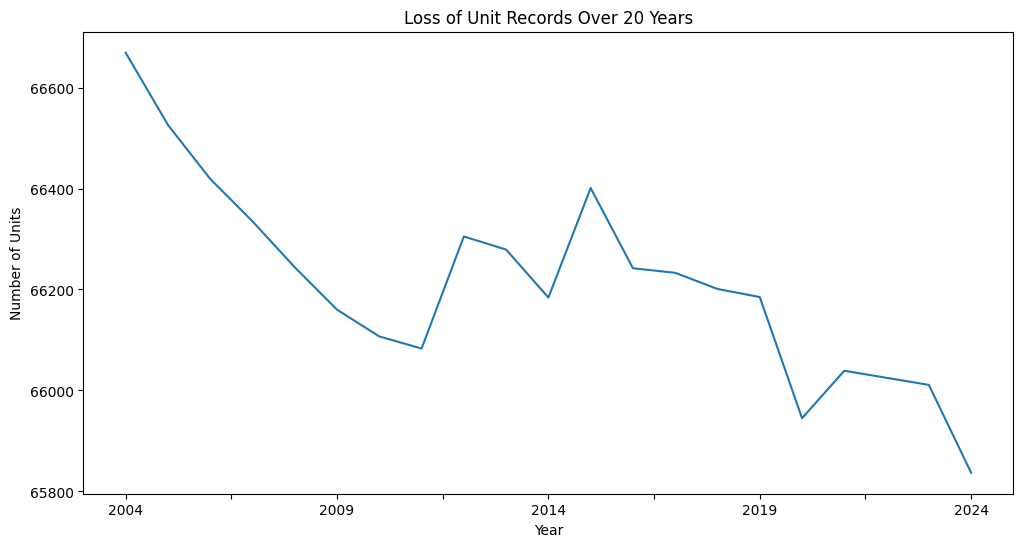

In [15]:
# for each year, count the number of non null rows

data = {
    '2004': [units_04['PID'].count()],
    '2005': [units_05['PID'].count()],
    '2006': [units_06['PID'].count()],
    '2007': [units_07['PID'].count()],
    '2008': [units_08['PID'].count()],
    '2009': [units_09['PID'].count()],
    '2010': [units_10['PID'].count()],
    '2011': [units_11['PID'].count()],
    '2012': [units_12['PID'].count()],
    '2013': [units_13['PID'].count()],
    '2014': [units_14['PID'].count()],
    '2015': [units_15['PID'].count()],
    '2016': [units_16['PID'].count()],
    '2017': [units_17['PID'].count()],
    '2018': [units_18['PID'].count()],
    '2019': [units_19['PID'].count()],
    '2020': [units_20['PID'].count()],
    '2021': [units_21['PID'].count()],
    '2022': [units_22['PID'].count()],
    '2023': [units_23['PID'].count()],
    '2024': [units_24['PID'].count()]
}

count = pd.DataFrame(data).transpose()

count.plot(kind='line', figsize=(12, 6), legend = False)
plt.xlabel('Year')
plt.ylabel('Number of Units')
plt.title("Loss of Unit Records Over 20 Years")

this line graph contains all of the PIDs that were recorded as r1, r2, r3, or r4 in 2004. as the years progressed, some if the units have been lost and were not accounted for. some were not recorded one year and were then recorded again later, either way there is a overal decline in the number of units that where recorded as resiendental family homes in 2004, this does *NOT* account for a change in land usage

In [10]:
# take those units that were residental in 2004 that are still in the dataset and remove any units that are no longer residental

residental_04 = units_04
residental_05 = units_05[(units_05['LU_2005'] == 'R1') | (units_05['LU_2005'] == 'R2') | (units_05['LU_2005'] == 'R3') | (units_05['LU_2005'] == 'R4')]
residental_06 = units_06[(units_06['LU_2006'] == 'R1') | (units_06['LU_2006'] == 'R2') | (units_06['LU_2006'] == 'R3') | (units_06['LU_2006'] == 'R4')]
residental_07 = units_07[(units_07['LU_2007'] == 'R1') | (units_07['LU_2007'] == 'R2') | (units_07['LU_2007'] == 'R3') | (units_07['LU_2007'] == 'R4')]
residental_08 = units_08[(units_08['LU_2008'] == 'R1') | (units_08['LU_2008'] == 'R2') | (units_08['LU_2008'] == 'R3') | (units_08['LU_2008'] == 'R4')]
residental_09 = units_09[(units_09['LU_2009'] == 'R1') | (units_09['LU_2009'] == 'R2') | (units_09['LU_2009'] == 'R3') | (units_09['LU_2009'] == 'R4')]
residental_10 = units_10[(units_10['LU_2010'] == 'R1') | (units_10['LU_2010'] == 'R2') | (units_10['LU_2010'] == 'R3') | (units_10['LU_2010'] == 'R4')]
residental_11 = units_11[(units_11['LU_2011'] == 'R1') | (units_11['LU_2011'] == 'R2') | (units_11['LU_2011'] == 'R3') | (units_11['LU_2011'] == 'R4')]
residental_12 = units_12[(units_12['LU_2012'] == 'R1') | (units_12['LU_2012'] == 'R2') | (units_12['LU_2012'] == 'R3') | (units_12['LU_2012'] == 'R4')]
residental_13 = units_13[(units_13['LU_2013'] == 'R1') | (units_13['LU_2013'] == 'R2') | (units_13['LU_2013'] == 'R3') | (units_13['LU_2013'] == 'R4')]
residental_14 = units_14[(units_14['LU_2014'] == 'R1') | (units_14['LU_2014'] == 'R2') | (units_14['LU_2014'] == 'R3') | (units_14['LU_2014'] == 'R4')]
residental_15 = units_15[(units_15['LU_2015'] == 'R1') | (units_15['LU_2015'] == 'R2') | (units_15['LU_2015'] == 'R3') | (units_15['LU_2015'] == 'R4')]
residental_16 = units_16[(units_16['LU_2016'] == 'R1') | (units_16['LU_2016'] == 'R2') | (units_16['LU_2016'] == 'R3') | (units_16['LU_2016'] == 'R4')]
residental_17 = units_17[(units_17['LU_2017'] == 'R1') | (units_17['LU_2017'] == 'R2') | (units_17['LU_2017'] == 'R3') | (units_17['LU_2017'] == 'R4')]
residental_18 = units_18[(units_18['LU_2018'] == 'R1') | (units_18['LU_2018'] == 'R2') | (units_18['LU_2018'] == 'R3') | (units_18['LU_2018'] == 'R4')]
residental_19 = units_19[(units_19['LU_2019'] == 'R1') | (units_19['LU_2019'] == 'R2') | (units_19['LU_2019'] == 'R3') | (units_19['LU_2019'] == 'R4')]
residental_20 = units_20[(units_20['LU_2020'] == 'R1') | (units_20['LU_2020'] == 'R2') | (units_20['LU_2020'] == 'R3') | (units_20['LU_2020'] == 'R4')]
residental_21 = units_21[(units_21['LU_2021'] == 'R1') | (units_21['LU_2021'] == 'R2') | (units_21['LU_2021'] == 'R3') | (units_21['LU_2021'] == 'R4')]
residental_22 = units_22[(units_22['LU_2022'] == 'R1') | (units_22['LU_2022'] == 'R2') | (units_22['LU_2022'] == 'R3') | (units_22['LU_2022'] == 'R4')]
residental_23 = units_23[(units_23['LU_2023'] == 'R1') | (units_23['LU_2023'] == 'R2') | (units_23['LU_2023'] == 'R3') | (units_23['LU_2023'] == 'R4')]
residental_24 = units_24[(units_24['LU_2024'] == 'R1') | (units_24['LU_2024'] == 'R2') | (units_24['LU_2024'] == 'R3') | (units_24['LU_2024'] == 'R4')]

print('04:', residental_04['PID'].count())
print('05:', residental_05['PID'].count())
print('06:', residental_06['PID'].count())
print('07:', residental_07['PID'].count())
print('08:', residental_08['PID'].count())
print('09:', residental_08['PID'].count())
print('10:', residental_10['PID'].count())
print('11:', residental_11['PID'].count())
print('12:', residental_12['PID'].count())
print('13:', residental_13['PID'].count())
print('14:', residental_14['PID'].count())
print('15:', residental_15['PID'].count())
print('16:', residental_16['PID'].count())
print('17:', residental_17['PID'].count())
print('18:', residental_18['PID'].count())
print('19:', residental_19['PID'].count())
print('20:', residental_20['PID'].count())
print('21:', residental_21['PID'].count())
print('22:', residental_22['PID'].count())
print('23:', residental_23['PID'].count())
print('24:', residental_24['PID'].count())

04: 66669
05: 66134
06: 65453
07: 64788
08: 64071
09: 64071
10: 63276
11: 63077
12: 63103
13: 62980
14: 62845
15: 62905
16: 62610
17: 62437
18: 62204
19: 61878
20: 61394
21: 61318
22: 61057
23: 60831
24: 60440


Text(0.5, 1.0, 'Loss of Residental Units Over 20 Years')

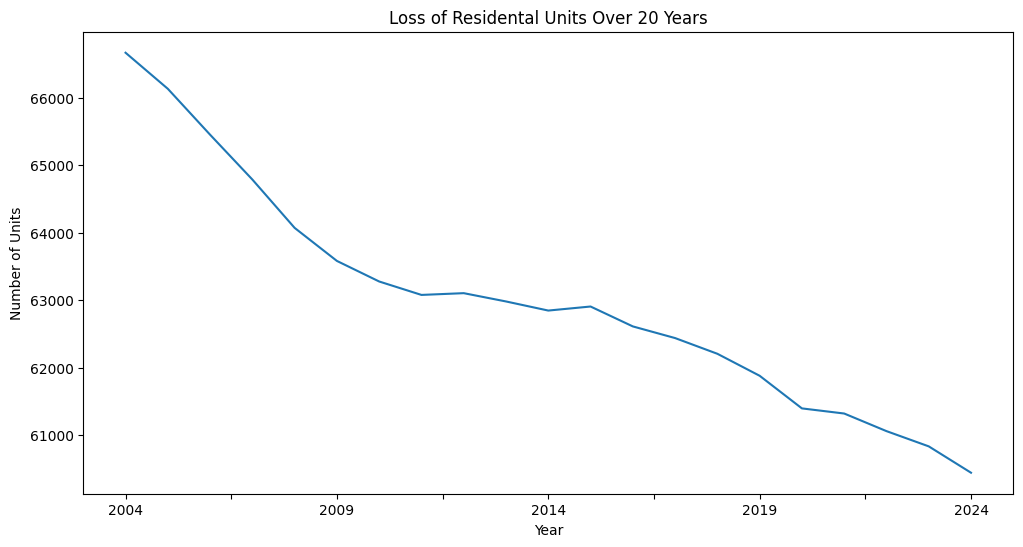

In [16]:
data = {
    '2004': [residental_04['PID'].count()],
    '2005': [residental_05['PID'].count()],
    '2006': [residental_06['PID'].count()],
    '2007': [residental_07['PID'].count()],
    '2008': [residental_08['PID'].count()],
    '2009': [residental_09['PID'].count()],
    '2010': [residental_10['PID'].count()],
    '2011': [residental_11['PID'].count()],
    '2012': [residental_12['PID'].count()],
    '2013': [residental_13['PID'].count()],
    '2014': [residental_14['PID'].count()],
    '2015': [residental_15['PID'].count()],
    '2016': [residental_16['PID'].count()],
    '2017': [residental_17['PID'].count()],
    '2018': [residental_18['PID'].count()],
    '2019': [residental_19['PID'].count()],
    '2020': [residental_20['PID'].count()],
    '2021': [residental_21['PID'].count()],
    '2022': [residental_22['PID'].count()],
    '2023': [residental_23['PID'].count()],
    '2024': [residental_24['PID'].count()]
}

count = pd.DataFrame(data).transpose()

count.plot(kind='line', figsize=(12, 6), legend = False)
# plt.ylim(ymin = 65700, ymax = 66800)
plt.xlabel('Year')
plt.ylabel('Number of Units')
plt.title("Loss of Residental Units Over 20 Years")

this line graph *DOES* take into consideration land usage

in this line graph we used all the units from the previous graph, so it only considers surviving PIDs that were residental in 2004. Of those remaining PIDs, we drop any that are no longer residental, ie, their land usage code is no longer r1, r2, r3, or r4. so this line graph represents the number of residental units that were residental in 2004 and are still residental in a given year

note: this does *NOT* consider if any new residental units have been added since 2004, it only represents the survival of residental units from 2004

there were 66669 residental units in 2004 and there remain 60440 of those original residental units in 2024

over 20 years we lost 6229 units with an average of 311.45 units per year